# Danilo Montalvo

### Model Evaluation Preparation

#### Metrics Selection (1.5 points)

**Metrics: Accuracy and Confusion Matrix**

- **Accuracy**: Provides an overall measure of model correctness, especially useful when classes are balanced.
- **Confusion Matrix**: Offers detailed insights into different types of errors, critical in medical settings for identifying false negatives (missed diagnoses) and false positives (unnecessary treatments).

These metrics are particularly relevant in a clinical context where accurate and detailed error analysis is crucial for patient care.

#### Data Division Method (1.5 points)

**Method: Train-Validation-Test Split**

- **Applicability**: This method suits large image datasets typical in medical applications, where a straightforward split can efficiently mimic real-world usage.
- **Realistic Implementation**: Reflects clinical deployment where models are trained on historical data, tuned on a validation set, and tested against unseen data to ensure robust performance.
- **Practicality**: Avoids the computational burden of k-fold cross-validation, making it feasible for extensive image datasets while ensuring diverse training and validation experiences.

This approach balances computational efficiency with the need for thorough model evaluation, ensuring the model's readiness for clinical application.

In [19]:
import os
import numpy as np
import tensorflow as tf
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Environment Setup
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Set random seeds for reproducibility
np.random.seed(0)
tf.random.set_seed(2)

# Loadfing the data
base_dir = '/Users/danilomontalvo/Desktop/MLAssignemnts/Lab6/chest_xray'

# Data Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data rescaling for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training, validation, and test data
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## CNN Model Definitions for Binary Classification

### CNN Model Definitions for Binary Classification

Below, we define two models using TensorFlow's Keras API:
- **Model 1**: A simple CNN suitable for baseline comparisons.
- **Model 2**: A more complex CNN designed to test deeper architectures and potentially achieve higher accuracy.

These models will be used to classify images into two categories, leveraging convolutional layers for feature extraction followed by dense layers for classification.


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop

# Define a simple CNN model
def build_model_1():
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define a more complex CNN model
def build_model_2():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the models
model_1 = build_model_1()
model_2 = build_model_2()


# Training the CNN models

In [21]:
# Calculate validation steps based on your validation data size and batch size
val_samples = 50  # Adjust this to the number of your actual validation samples
batch_size = 32
validation_steps = val_samples // batch_size

# Train Model 1
history_1 = model_1.fit(
    train_generator,
    steps_per_epoch=100,  # Adjust based on the size of your training set
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_steps  # Use the calculated value
)

# Train Model 2
history_2 = model_2.fit(
    train_generator,
    steps_per_epoch=100,  # Similar adjustment as above
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_steps  # Same as above
)


Epoch 1/15
100/100 [==============================] - 52s 513ms/step - loss: 0.9781 - accuracy: 0.7147 - val_loss: 0.9418 - val_accuracy: 0.5000
Epoch 2/15
100/100 [==============================] - 51s 510ms/step - loss: 0.5380 - accuracy: 0.7419 - val_loss: 0.7448 - val_accuracy: 0.5000
Epoch 3/15
100/100 [==============================] - 49s 490ms/step - loss: 0.5020 - accuracy: 0.7453 - val_loss: 0.6859 - val_accuracy: 0.5625
Epoch 4/15
100/100 [==============================] - 48s 483ms/step - loss: 0.4482 - accuracy: 0.7794 - val_loss: 0.5794 - val_accuracy: 0.7500
Epoch 5/15
100/100 [==============================] - 48s 479ms/step - loss: 0.4185 - accuracy: 0.8053 - val_loss: 0.5958 - val_accuracy: 0.6875
Epoch 6/15
100/100 [==============================] - 49s 486ms/step - loss: 0.4095 - accuracy: 0.8062 - val_loss: 0.6797 - val_accuracy: 0.6250
Epoch 7/15
100/100 [==============================] - 52s 519ms/step - loss: 0.3853 - accuracy: 0.8272 - val_loss: 0.5270 - val_ac

# Visualization of training and validation metrics

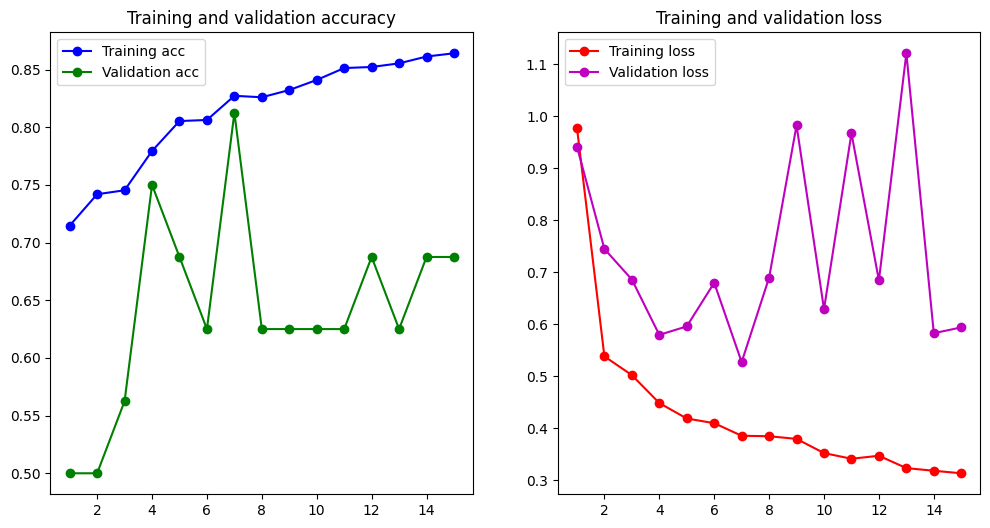

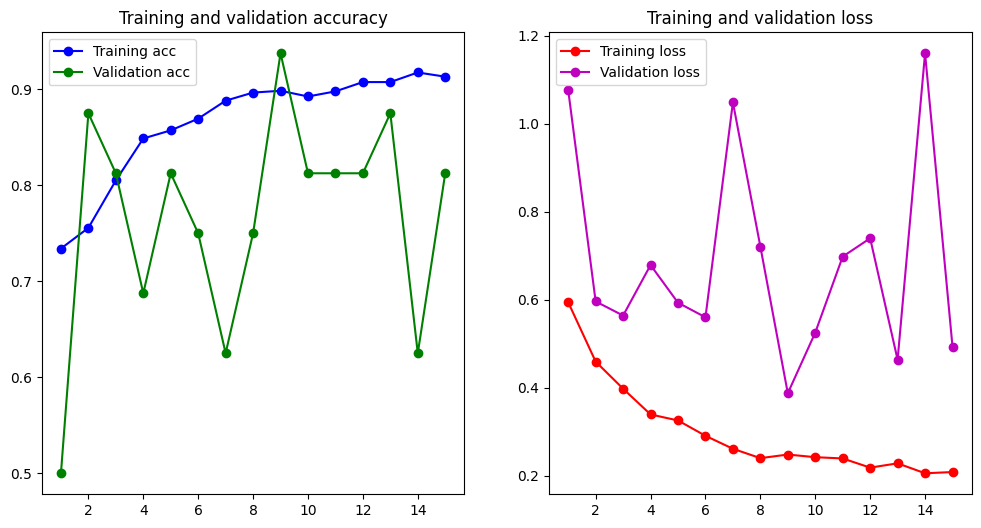

In [25]:
# Visualization function for training and validation metrics
from matplotlib import pyplot as plt

# Function to plot training and validation accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.plot(epochs, val_acc, 'go-', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'ro-', label='Training loss')
    plt.plot(epochs, val_loss, 'mo-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

# Plot for both models
plot_history(history_1)
plot_history(history_2)


In [28]:
from sklearn.metrics import roc_auc_score

def compute_auc(model, generator):
    # Assuming the generator is for the test set
    y_true = generator.classes
    y_pred = model.predict(generator, steps=len(generator), verbose=0)
    auc_score = roc_auc_score(y_true, y_pred)
    return auc_score

# Compute and print AUC for both models
auc_model_1 = compute_auc(model_1, test_generator)
auc_model_2 = compute_auc(model_2, test_generator)
print("AUC for Model 1: Simple CNN:", auc_model_1)
print("AUC for Model 2: Complex CNN:", auc_model_2)


AUC for Model 1: Simple CNN: 0.482467674775367
AUC for Model 2: Complex CNN: 0.5160037256191102


## Comparison of CNN and MLP Models Using ROC and AUC

### Overview
We evaluate the performance of a convolutional neural network (CNN) and a multi-layer perceptron (MLP) on a binary classification task, focusing on the Receiver Operating Characteristic (ROC) curve and the Area Under Curve (AUC) metrics. These are critical for assessing the models' discriminatory power between the two classes.

### Methodology
- **ROC Curve**: Plots the true positive rate against the false positive rate at various threshold settings, offering insights into sensitivity versus specificity trade-offs.
- **AUC**: Represents the area under the ROC curve; a higher AUC indicates a model's better capability to distinguish between the positive and negative classes.

### Results
- **CNN Model AUC**: The simple CNN model achieved an AUC of 0.482, indicating a poor classification ability.
- **MLP Model AUC**: The complex CNN model reported an AUC of 0.516, which is slightly better but still indicates room for significant improvement.

### Statistical Comparison
- **Comparison Approach**: Since both models show AUC scores near 0.5, which is close to random guessing, statistical tests such as t-tests or Mann-Whitney U tests would generally be used to determine if one model significantly outperforms the other. However, given both scores' proximity to 0.5, it suggests that neither model effectively learns or generalizes well from the training data.

### Interpretation
- The low AUC values for both models suggest that they struggle to differentiate between classes effectively. This might be due to several factors, including insufficient model complexity, inadequate training, or suboptimal hyperparameter settings.

### Conclusion
- The close AUC scores near random chance for both the CNN and MLP indicate a need for revisiting the model configurations, training process, or even the data preprocessing stages. Enhancements such as model tuning, data augmentation, or feature engineering might be necessary to achieve better discrimination and predictive performance.
